In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
path_revision = 'Revision'

In [3]:
def get_tables_openmp(base_path, report_name):
    res = []

    for i in range(1,5):
        index = pow(2, i)
        res.append(pd.read_csv(base_path + '/OpenMP/' + str(index) + '/' + report_name + '.txt').to_numpy())
    
    return res

In [4]:
def get_tables_TBB(base_path, report_name):
    return pd.read_csv(base_path + '/TBB/' + report_name + '.txt').to_numpy() 

In [5]:
def get_table_sequential(base_path, report_name):
    return pd.read_csv(base_path + '/Sequential/' + report_name + '.txt').to_numpy() 

In [6]:
def create_row(seq, open, idx, idy):
    tmp_row = [seq[idx, idy]]

    for i in range(4):
        tmp_row.append(open[i][idx, idy])
    
    return tmp_row

In [7]:
tbb_revision = get_tables_TBB(path_revision, 'report_IO_Manager')
sequential_revision = get_table_sequential(path_revision, 'report_IO_Manager')
openMP_revision = get_tables_openmp(path_revision, 'report_IO_Manager')

tot = [6, 4, 5, 2, 4]

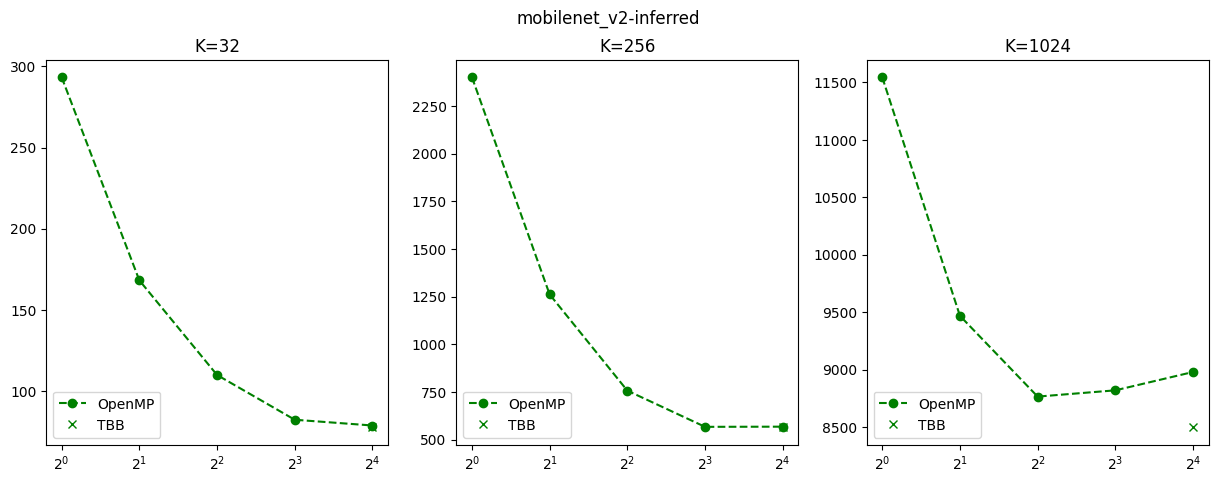

In [8]:
# MobileNet
fix, axs = plt.subplots(1, 3, figsize=(15, 5))
fix.suptitle(sequential_revision[0, 0])

vals = [0,3,5]

for i, ax in enumerate(axs.flat):
    ax.set_title('K=' + str(int(sequential_revision[vals[i], 1])))

    ax.plot([1,2,4,8,16], create_row(sequential_revision, openMP_revision, vals[i], 2), '--go')
    ax.plot(16, tbb_revision[vals[i], 2], 'gx')

    ax.set_xscale('log', base=2)
    ax.legend(['OpenMP', 'TBB'], loc='lower left')

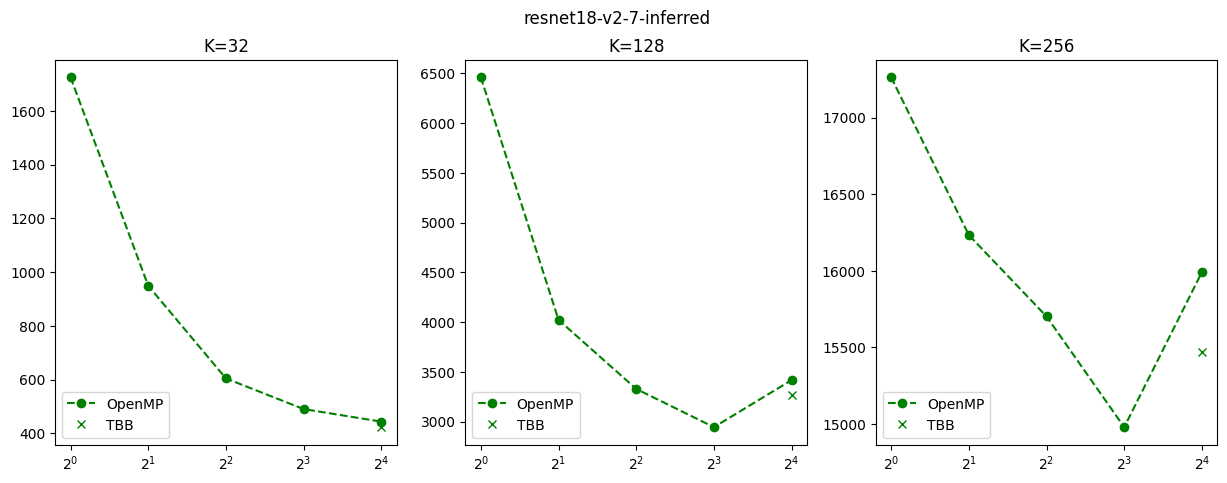

In [9]:
# ResNet
fix, axs = plt.subplots(1, 3, figsize=(15, 5))
fix.suptitle(sequential_revision[tot[0], 0])

vals = [tot[0], tot[0] + 2, tot[0] + 3]

for i, ax in enumerate(axs.flat):
    ax.set_title('K=' + str(int(sequential_revision[vals[i], 1])))

    ax.plot([1,2,4,8,16], create_row(sequential_revision, openMP_revision, vals[i], 2), '--go')
    ax.plot(16, tbb_revision[vals[i], 2], 'gx')

    ax.set_xscale('log', base=2)
    ax.legend(['OpenMP', 'TBB'], loc='lower left')

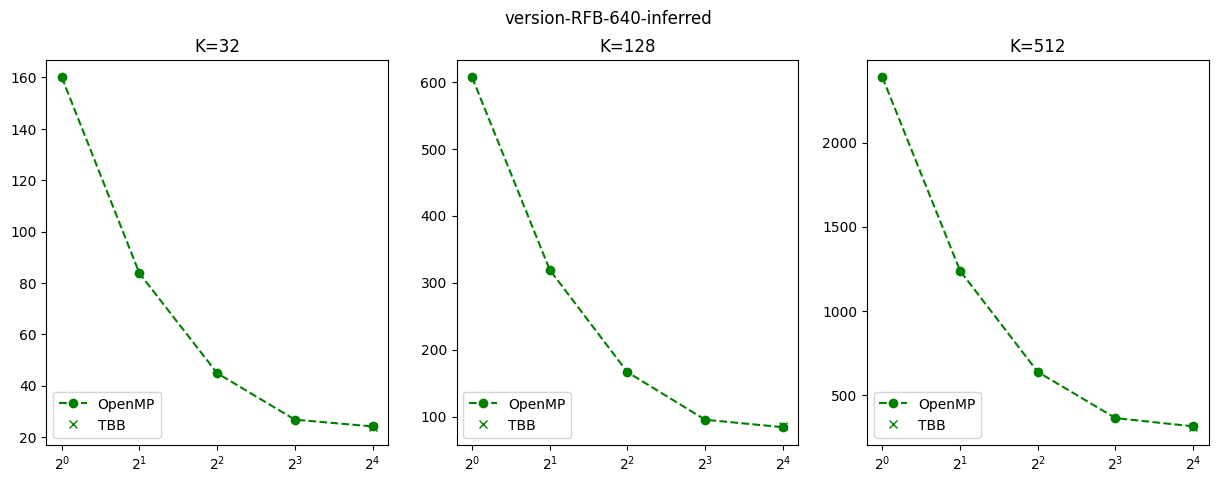

In [13]:
# RFB-640
fix, axs = plt.subplots(1, 3, figsize=(15, 5))
fix.suptitle(sequential_revision[tot[0] + tot[1], 0])

vals = [tot[0] + tot[1], tot[0] + tot[1] + 2, tot[0] + tot[1] + 4]

for i, ax in enumerate(axs.flat):
    ax.set_title('K=' + str(int(sequential_revision[vals[i], 1])))

    ax.plot([1,2,4,8,16], create_row(sequential_revision, openMP_revision, vals[i], 2), '--go')
    ax.plot(16, tbb_revision[vals[i], 2], 'gx')

    ax.set_xscale('log', base=2)
    ax.legend(['OpenMP', 'TBB'], loc='lower left')

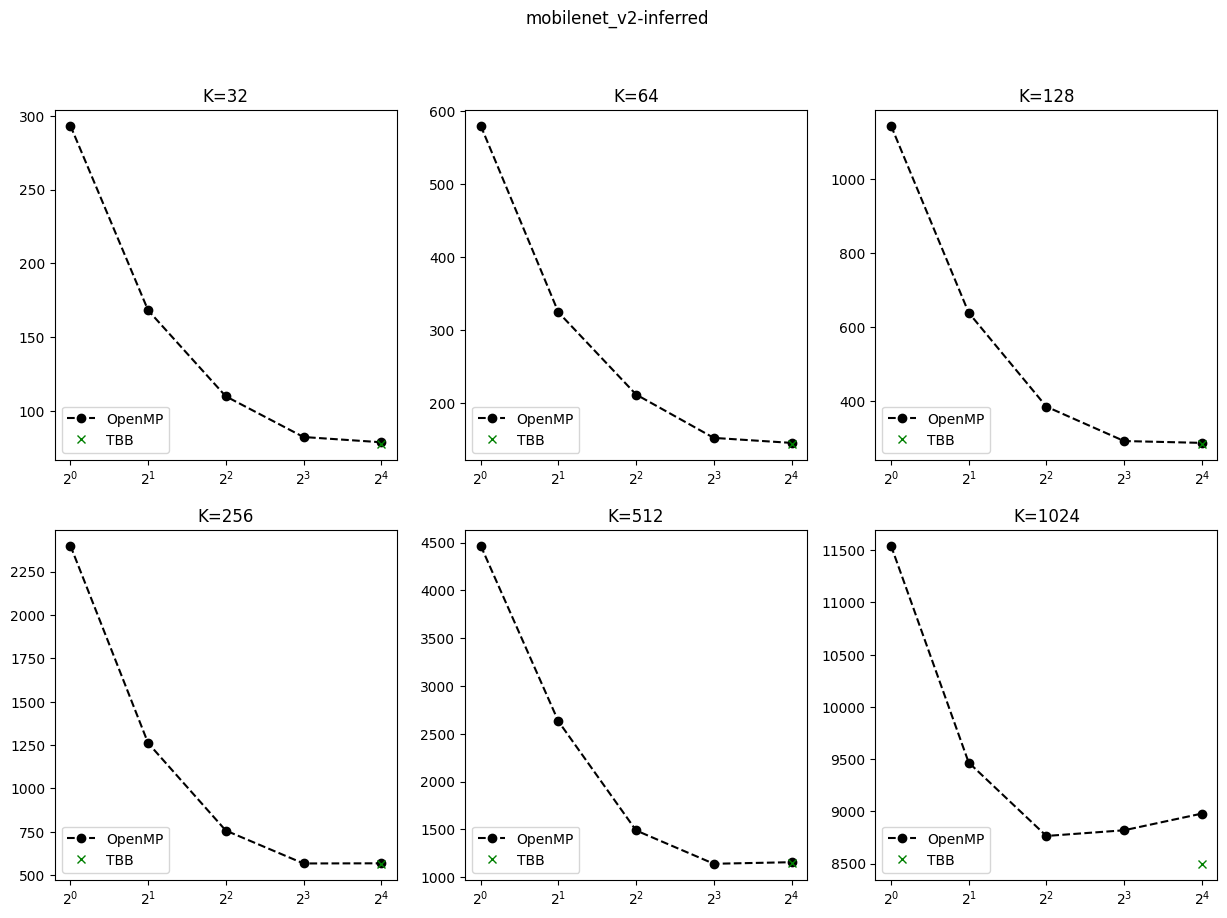

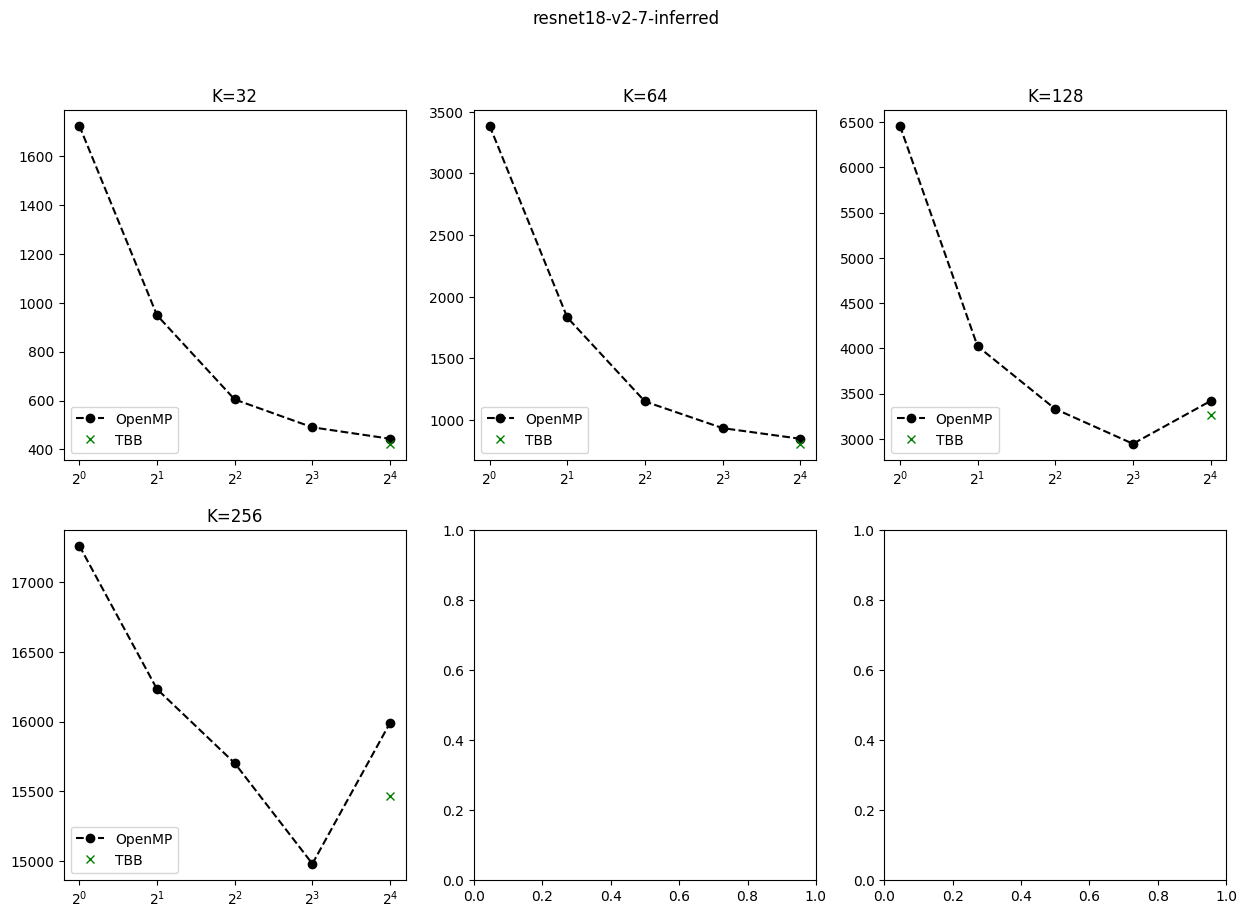

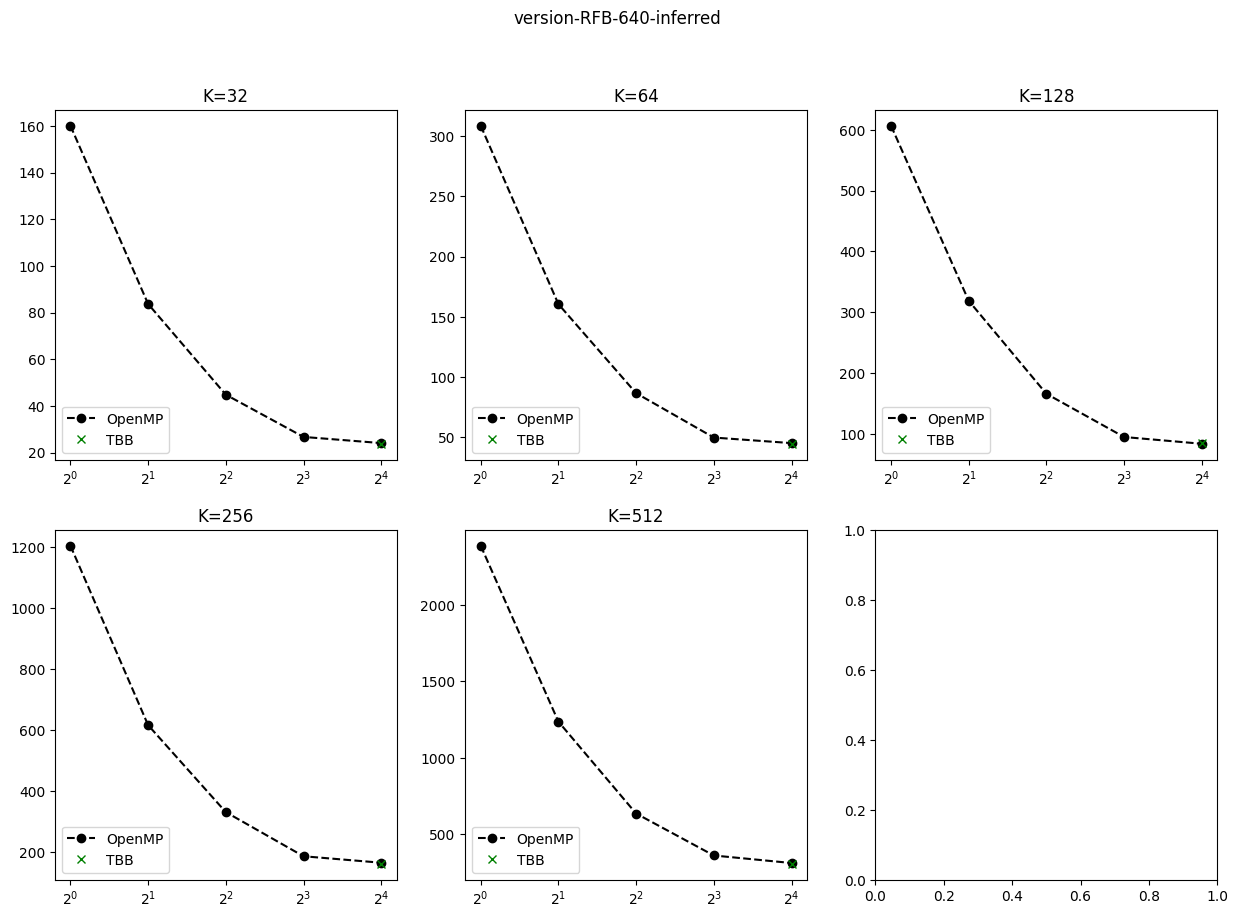

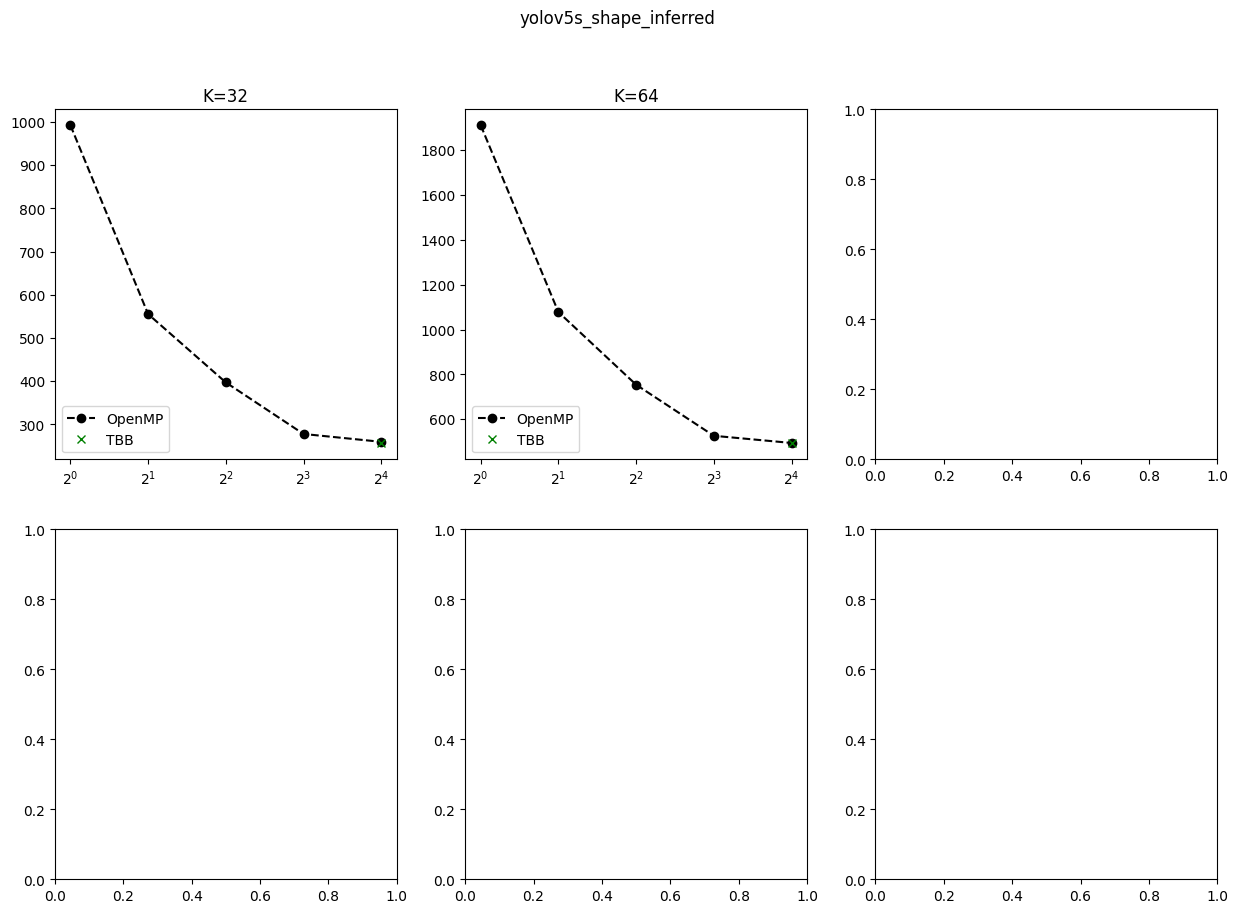

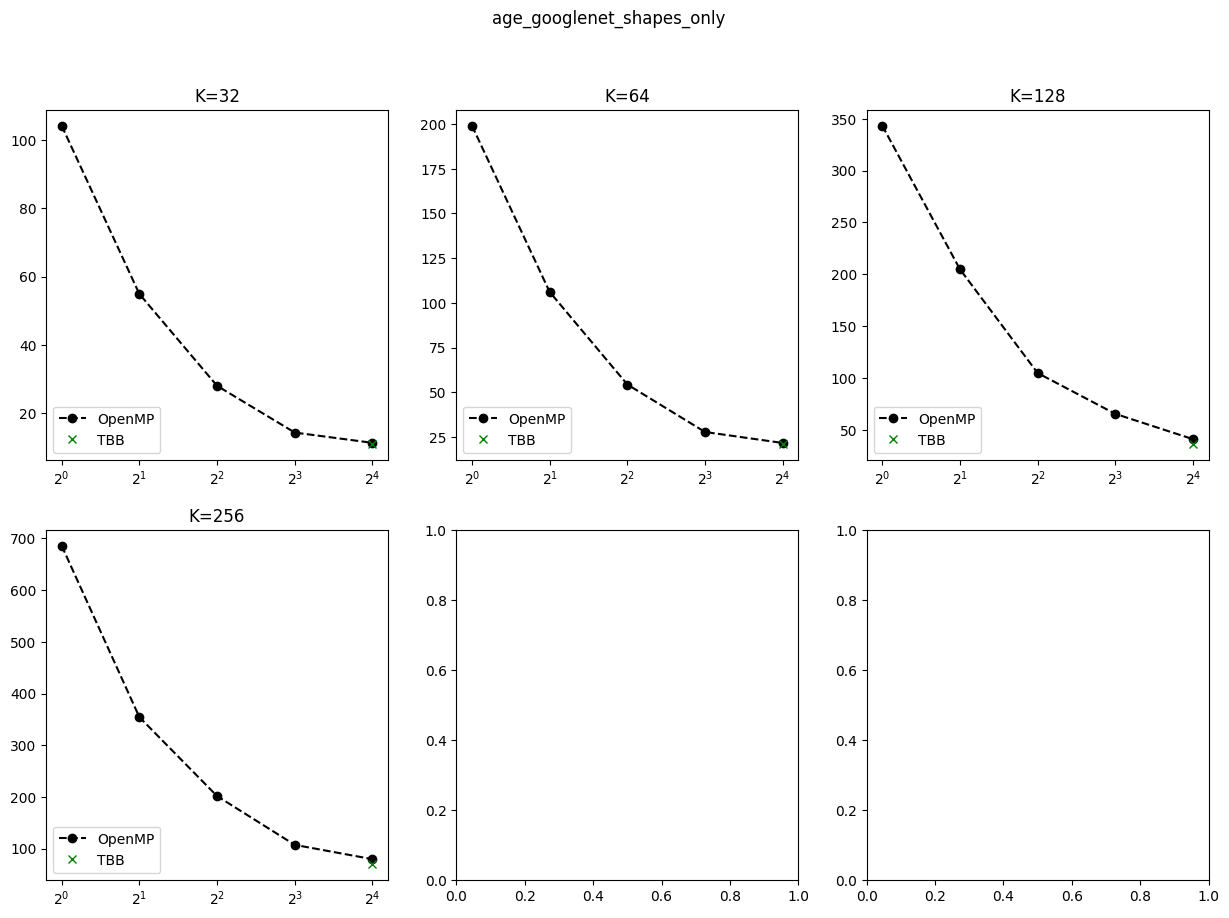

In [11]:
prev = 0
for i in range(len(tot)):
    fix, axs = plt.subplots(2, 3, figsize=(15, 10))

    fix.suptitle(sequential_revision[prev, 0])
    

    for j in range(tot[i]):
        y = j % 3
        x = math.floor(j / 3)

        axs[x,y].plot([1,2,4,8,16], create_row(sequential_revision, openMP_revision, prev+j, 2), '--ko')
        axs[x,y].plot(16, tbb_revision[prev+j, 2], 'gx')

        axs[x,y].set_title('K=' + str(sequential_revision[prev + j, 1]))

        axs[x,y].set_xscale('log', base=2)
        axs[x,y].legend(['OpenMP', 'TBB'], loc='lower left')
    
    prev = tot[i] + prev